<h1>CP640 - Sentiment Analysis Project</h1>

<h3>Library Imports</h3>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# NLTK Libraries
from nltk import FreqDist
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# SKLearn Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Word Cloud Libraries
from wordcloud import WordCloud

<h3>Subroutines</h3>

In [2]:
# English stop words provided by the NLTK corpus
stop_words = set(stopwords.words('english'))
stop_words = [w for w in stop_words]

"""
extract_words
-------------
Extracts the frequency distribution of the top x (default:30) words within a collection of string data.
Stop words are not counted within the counts.

Parameters
----------
string_data: Series, dtype:string
    A series of strings from which the frequecies of words are counted.
top: integer (default=30)
    The number of words to include in the top count. For example, top=30 returns the top 30 most frequently used
    words.
remove_nouns: boolean (default=False)
    Whether or not nouns should be included in the frequecy distributions. Includes nouns by default.
    
Returns
-------
word_frequencies: list of tuple pairs of form (word:string, count:integer) where word is a string word and count 
    is the frequency of that particular word.
"""
def extract_words(string_data, top=30, remove_nouns=False):
    extracted_words =[]
    for data in string_data:
        if type(data) is str:
            word_tokens = word_tokenize(data)
            if remove_nouns:
                word_tokens = [t[0] for t in pos_tag(word_tokens) if 'NN' not in t[1]]
            extracted_words = extracted_words + [w.lower() for w in word_tokens if not w.lower() in stop_words and w.isalpha()]
    return FreqDist(extracted_words).most_common(top)

"""
get_rank
--------
Returns the rank of an item in an ordered list where 0 is the highest rank, 1 the second, etc. (Equivalent to the 
position of the item in the list, but rank is used for context). Returns -1 is the item is not in the list.

Parameters
----------
ordered_list: list
    A list ordered by its ranking criteria
item: Same type as the items in the list
    The item whom's rank is to be determined

Returns
-------
rank: integer
    The rank of the item passed.
"""
def get_rank(ordered_list, item):
    res = -1
    for i in range(len(ordered_list)):
        if item == ordered_list[i]:
            res = i
            break
    return res

"""
generate_text_vector
--------------------
Generates a binary vector (list) that corresponds to the presence of a word within a string text.
0 - if the word is not in the text;
1 - if the word is in the text.

Parameters
----------
text: string
    The string text to be parsed for certain words.
words: list of strings
    The words to detect within the passed text.
    
Returns
-------
v: list of binary values (0 or 1)
    The text vector indicating if a particular word is found in the text. For example, if v[1]==0, then words[1]
    was detected in the text.
"""
def generate_text_vector(text, words):
    v = [0 for w in words]
    for i in range(len(words)):
        if type(text) is not str:
            pass # default to 0 vector
        elif words[i] in text:
            v[i] = 1
    return v

"""
mean
----
Calculates the mean of a list of numerical values.

Parameters
----------
list_of_vals : list 
    A list of float or integer values.

Returns
-------
mean: float
    The mean of the numerical values that were passed.
"""
def mean(list_of_vals):
    total = 0
    for v in list_of_vals:
        total+=v
    return total/len(list_of_vals)

"""
standard_deviation
------------------
Calculates the standard deviation of a list of numerical values.

Parameters
----------
list_of_vals : list 
    A list of float or integer values.

Returns
-------
standard_deviation: float
    The standard deviation of the numerical values that were passed.
"""
def standard_deviation(list_of_vals):
    u = mean(list_of_vals)
    sum_of_squares=0
    for v in list_of_vals:
        sum_of_squares+=(v-u)**2
    return math.sqrt(sum_of_squares/len(list_of_vals))

"""
covariance
----------
Calculates the covariance between two lists of numerical values.

Parameters
----------
list_of_vals_a : list 
    A list of float or integer values.
list_of_vals_b : list
    A list of float or integer values. Corresponding values should be in the same order as the values in list_of_vals_a.
    Furthermore, it should be the same length as list_of_vals_a.

Returns
-------
covariance: float
    The covariance between the 2 lists of data that were passed.
"""
def covariance(list_of_vals_a, list_of_vals_b):
    mean_a = mean(list_of_vals_a)
    mean_b = mean(list_of_vals_b)
    
    sum = 0 
    for i in range(len(list_of_vals_a)):
        sum += (list_of_vals_a[i] - mean_a) * (list_of_vals_b[i] - mean_b)
    return sum/(len(list_of_vals_a))

<h3>Review Data Import</h3>

In [3]:
review_data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
review_data[:5]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<h3>Graphs of destributions in the review data</h3>

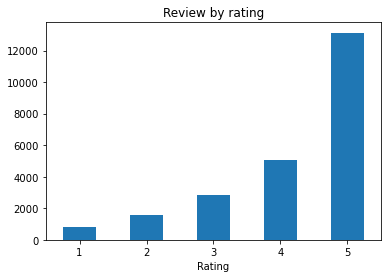

In [4]:
pd.Categorical(review_data['Rating']).describe().plot(y='counts', kind='bar', legend=False)
plt.title("Review by rating")
plt.xticks(rotation='horizontal')
plt.xlabel("Rating")
plt.show()

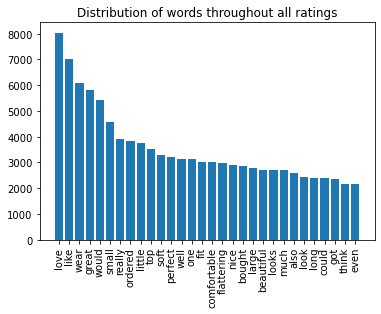

In [5]:
word_freq = extract_words(review_data['Review Text'], remove_nouns=True)

plot_data = list(zip(*word_freq))
words = plot_data[0]
word_count = plot_data[1]
x_pos = np.arange(len(words))

plt.bar(x_pos, word_count)
plt.title("Distribution of words throughout all ratings")
plt.xticks(x_pos, words, rotation='vertical')
#plt.ylabel(...)
plt.show()

Words by rating:


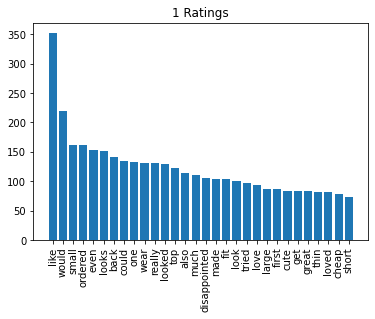

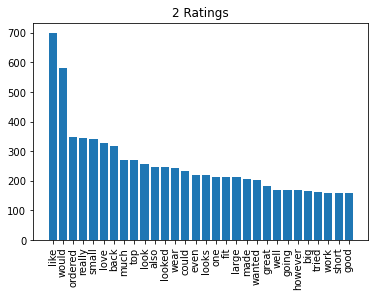

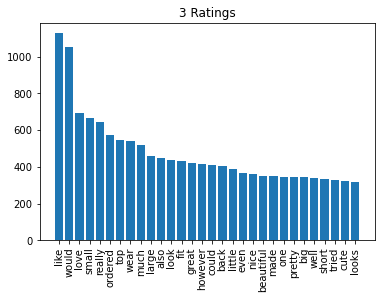

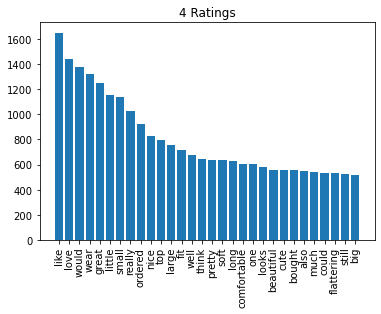

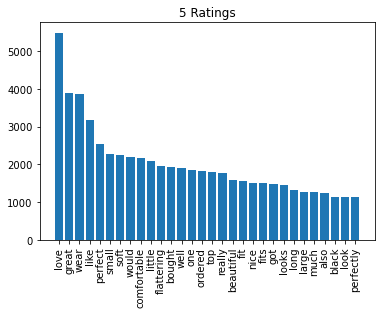

In [6]:
words_by_rating = []
for i in range(1,6):
    words_by_rating.append(extract_words(review_data[review_data['Rating']==i]['Review Text'],remove_nouns=True))
print("Words by rating:")
for i in range(5):
    plot_data = list(zip(*words_by_rating[i]))
    words = plot_data[0]
    word_count = plot_data[1]
    x_pos = np.arange(len(words))

    plt.bar(x_pos, word_count)
    plt.xticks(x_pos, words, rotation='vertical')
    plt.title("{0} Ratings".format(i+1))
#plt.ylabel(...)
    plt.show()

<h3>Implementation</h3>

Can adjust the following cell as needed. Through experimentation, the top 800 words pulled from each level of rating proved sufficient to build a sentiment word bank:

In [7]:
number_of_words = 800

In [8]:
# Extraction of words for each rating
words_by_rating = []
for i in range(1,6):
    words_by_rating.append(extract_words(review_data[review_data['Rating']==i]['Review Text'],remove_nouns=True,top=number_of_words))

We are interested in the words that appeared all of the distributions for each rating. Hence, <br>
$\{\text{Word Bank}\} = \cap_{i=1}^5 \{ \text{Words extracted of rating }i \}$

In [9]:
word_bank = list(zip(*words_by_rating[0]))[0]
for i in range(1,5):
    word_bank = list(set(word_bank) & set(list(zip(*words_by_rating[i]))[0]))

print("Of the {0} words extracted for each rating, {1} are used for the word bank.".format(number_of_words,len(word_bank)))

Of the 800 words extracted for each rating, 475 are used for the word bank.


A set of ordered pairs are constructed for each word in the word bank where the first component is the rating the second is the ranking that word had under that rating. For example, (1, 220) means is was the 220th most frequent 
word when the rating was 1.

In [10]:
word_score_sets = []
for word in word_bank:
    score_set = [];
    for i in range(5):
        score_set.append((i+1,get_rank(list(zip(*words_by_rating[i]))[0], word)+1))
    word_score_sets.append(score_set)

for i in range(len(word_bank)):
    score_set = word_score_sets[i]
    print("{0}: {1}, {2}, {3}, {4}, {5}".format(word_bank[i], score_set[0],score_set[1],score_set[2],score_set[3], score_set[4]))

different: (1, 105), (2, 131), (3, 92), (4, 111), (5, 93)
perhaps: (1, 305), (2, 238), (3, 204), (4, 284), (5, 513)
barely: (1, 224), (2, 168), (3, 230), (4, 337), (5, 608)
start: (1, 339), (2, 420), (3, 469), (4, 652), (5, 703)
open: (1, 213), (2, 253), (3, 258), (4, 242), (5, 218)
amazing: (1, 502), (2, 360), (3, 278), (4, 254), (5, 121)
clean: (1, 755), (2, 474), (3, 507), (4, 578), (5, 677)
heavy: (1, 124), (2, 145), (3, 163), (4, 162), (5, 181)
delicate: (1, 283), (2, 329), (3, 274), (4, 316), (5, 252)
goes: (1, 215), (2, 174), (3, 239), (4, 197), (5, 151)
shorter: (1, 200), (2, 120), (3, 134), (4, 141), (5, 201)
feels: (1, 175), (2, 427), (3, 244), (4, 251), (5, 211)
stylish: (1, 757), (2, 709), (3, 545), (4, 280), (5, 183)
unique: (1, 317), (2, 232), (3, 202), (4, 122), (5, 107)
flares: (1, 579), (2, 274), (3, 480), (4, 640), (5, 664)
buy: (1, 91), (2, 142), (3, 144), (4, 145), (5, 85)
expect: (1, 241), (2, 290), (3, 304), (4, 309), (5, 365)
huge: (1, 34), (2, 39), (3, 71), (4, 

Due to the sheer number of words available to construct the word bank, we can prune words that do not show much correlation between the rating that was given and the rank of the word. Through experimentation, we find that we could be very strict; pruning out those whose correlation coefficient has magnitude less than 0.9, and still maintain a large set of words. Such words we dub 'deterministic'. <br>
<br>
Deterministic words of negative correlation implies the frequency of a word increases as the rating increases. Thus, such words display positive sentiment. Similarly, those of positive correlation show negative sentiment

In [11]:
corr_threshold = 0.9

In [12]:
# Calculating the correlation coefficients for each word in the word bank
corr_coeffs = []
for i in range(len(word_score_sets)):
    score_set = word_score_sets[i]
    ratings = [d[0] for d in score_set]
    scores = [d[1] for d in score_set]
    corr = covariance(ratings,scores)/(standard_deviation(ratings)*standard_deviation(scores))
    #print("{0}: {1} {2}".format(word_bank[i],corr,ratings))
    corr_coeffs.append(corr)

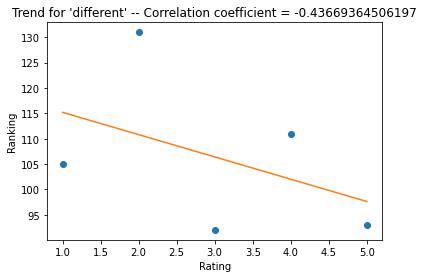

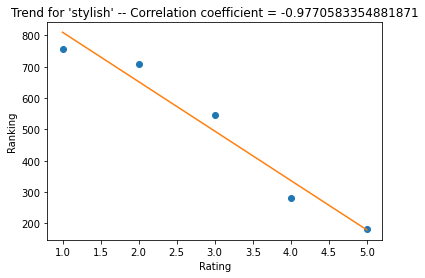

In [30]:
word = word_bank[0]
score_set = word_score_sets[0]
corr = corr_coeffs[0]

x = [score[0] for score in score_set]
y = [score[1] for score in score_set]
m, b = np.polyfit(x,y,1)

plt.plot(x, y, 'o')
plt.plot(x, m*np.array(x)+b)
plt.title("Trend for '{0}' -- Correlation coefficient = {1}".format(word, corr))
plt.ylabel("Ranking")
plt.xlabel("Rating")
plt.show()

word = word_bank[12]
score_set = word_score_sets[12]
corr = corr_coeffs[12]

x = [score[0] for score in score_set]
y = [score[1] for score in score_set]
m, b = np.polyfit(x,y,1)

plt.plot(x, y, 'o')
plt.plot(x, m*np.array(x)+b)
plt.title("Trend for '{0}' -- Correlation coefficient = {1}".format(word, corr))
plt.ylabel("Ranking")
plt.xlabel("Rating")
plt.show()

In [13]:
# Words are deemed deterministic if the magnitudes the the correlation coefficients are above
# a certain threshold.
positive_words = []
negative_words = []
deterministic_words = []
for i in range(len(word_bank)):
    if(abs(corr_coeffs[i])>corr_threshold):
        print("{0}: {1}".format(word_bank[i],corr_coeffs[i]))
        deterministic_words.append(word_bank[i])
        if corr_coeffs[i]<0:
            positive_words.append(word_bank[i])
        else:
            negative_words.append(word_bank[i])
print("{0} words".format(len(deterministic_words)))

start: 0.9786893802718173
amazing: -0.9765762980037885
heavy: 0.963131154942888
stylish: -0.9770583354881871
unique: -0.9779663152284359
expect: 0.9507379889002351
huge: 0.9121059756663578
feel: -0.90939158411454
perfectly: -0.9611221647599425
works: -0.9714680559835719
thought: 0.9379429217827664
wrong: 0.9613785559694351
bulky: 0.9857282949316624
beautifully: -0.9948525117331495
true: -0.9877787623330814
slightly: -0.9394878713363243
vibrant: -0.9651581157915683
great: -0.9880290880045325
even: 0.9433045006743211
getting: -0.9044697345482215
excited: 0.9324952686256974
green: -0.9602109044373053
roomy: -0.9412459493036154
completely: 0.9482499134923003
receive: 0.9083508519513962
dry: 0.9238034559663899
typical: -0.9392204376590876
pictured: 0.9112909128371405
appear: 0.9114924286474717
could: 0.9800774412771115
happy: -0.967930679389031
unless: 0.9000147151222727
fits: -0.9265262936965699
going: 0.9191816118635271
disappointed: 0.9340704459495319
either: 0.9211077592016933
dress: -0

In [14]:
print("Of the {0} words in the word bank, {1} words are deemed deterministic.".format(len(word_bank),len(deterministic_words)))

Of the 475 words in the word bank, 117 words are deemed deterministic.


Deterministic words of positive sentiment:


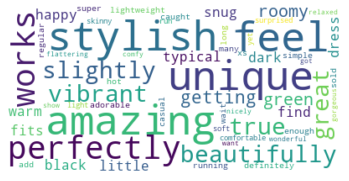

Deterministic words of negative sentiment:


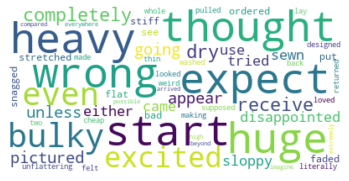

In [32]:
#convert list to string and generate
positive_string=(" ").join(positive_words)
negative_string=(" ").join(negative_words)

# lower max_font_size, change the maximum number of word and lighten the background:
print("Deterministic words of positive sentiment:")
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_string)
plt.figure()
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

print("Deterministic words of negative sentiment:")
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_string)
plt.figure()
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

<h3>Construction of the model</h3>

Each review is processed to a binary vector representing if a particular deterministic word is present within the text. 'Recommended IND' is included as it could be treated as a deterministic word of positive sentiment. (The inclusion improved accuracy by 20%)

In [17]:
text_vectors = []
for text in review_data['Review Text']:
    text_vectors.append(generate_text_vector(text,deterministic_words))
words_df = pd.DataFrame(np.array(text_vectors), columns=deterministic_words)
processed_review_data = words_df.join(review_data['Recommended IND']).join(review_data['Rating'])
print(processed_review_data)

       start  amazing  heavy  stylish  unique  expect  huge  feel  perfectly  \
0          0        0      0        0       0       0     0     0          0   
1          0        0      0        0       0       0     0     0          0   
2          0        0      0        0       0       0     0     0          0   
3          0        0      0        0       0       0     0     0          0   
4          0        0      0        0       0       0     0     0          0   
...      ...      ...    ...      ...     ...     ...   ...   ...        ...   
23481      0        0      0        0       0       0     0     0          0   
23482      0        0      0        0       0       0     0     0          0   
23483      0        0      0        0       0       0     0     0          0   
23484      0        0      0        0       0       0     0     0          1   
23485      0        0      0        0       0       0     0     0          1   

       works  ...  wonderful  nicely  w

Variables in the cell below are for the test size and the random state for the data split.<br>
<br>
A linear regression model is used as we hypothesize that the presence of each deterministic word bears a certain weight to how a user would rate the product.

In [18]:
test_percent = 0.3
r_state = 23

In [19]:
features = processed_review_data.drop(columns='Rating')
targets = processed_review_data['Rating']

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size = test_percent,random_state = r_state)

In [20]:
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(train_features,train_targets)

predictions = LR.predict(test_features)
# Predictions are rounded to the closest integer
predictions = [round(p) for p in predictions]
# Predictions are then clamped so that they lie in the range of 1 to 5
for i in range(len(predictions)):
    if predictions[i] > 5:
        predictions[i] = 5
    elif predictions[i] < 1:
        predictions[i] = 1


<h3>Evaluation</h3>

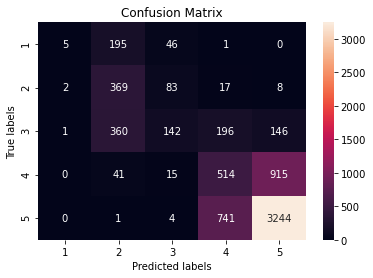

In [21]:
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_targets, predictions)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix) # rows are target, columns are predicted   

ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '2', '3','4','5']); ax.yaxis.set_ticklabels(['1', '2','3','4','5']);

#print("Confusion Matrix:")
#print(matrix_df)
#print()
#print("Classification Accuracy: {0}".format(metrics.accuracy_score(test_targets,predictions)))

The explicit accuracy of the classifier is poor when trying to obtain exact predictions. However, it is observed that the predictions mostly occur close to the diagonal of the matrix. Therefore, if the purpose of the classifier is to simply capture a rough estimate of the customers impression of the product, then it does so with a fair accuracy.

In [22]:
print("Classification Accuracy: {0}".format(metrics.accuracy_score(test_targets,predictions)))
correct_in_range = confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[4][4] + confusion_matrix[4][3]
for i in range(1,4):
    correct_in_range += confusion_matrix[i][i] + confusion_matrix[i][i-1] + confusion_matrix[i][i+1]
total = 0
for i in range(5):
    for j in range(5):
        total += confusion_matrix[i][j]
print("Accuracy that a prediction p is correct in range [p-1,p+1]: {0}".format(correct_in_range/total))

Classification Accuracy: 0.606585296622197
Accuracy that a prediction p is correct in range [p-1,p+1]: 0.9623900085154697
